Neuromorphic engineering I

## Lab 3: Transistor superthreshold saturation current and drain characteristics


**Reminder: Did you `git pull` the exercises before starting this notebook?**

Group number (if given one by TA):

Team member 1:

Team member 2:

Date:

CoACH Chip number:

-------------------------------------------------------------------------------------------------------------------

The objective of this lab is to understand _super-threshold_ ( also called _above-threshold_ or _strong inversion_ ) transistor operation and to understand transistor drain conductance characteristics, particularly _channel length modulation_.

The specific experimental **objectives of this lab**  are as follows: 
1. To characterize drain current of a transistor as a function of gate voltage in superthreshold operation in the ohmic (triode) and saturation regions.
2. To characterize the drain saturation properties in super-threshold.
3. To characterize drain conductance (the Early effect) and how it scales with transistor length (may not be possible this year) and saturation drain current.

An intuitive and quantitative understanding of all these effects, along with the subthreshold behavior (last week), is useful for the design of effective circuits, especially analog design of high performance amplifiers.

# 1 Terminology

- above-threshold = super-threshold =  strong inversion
- sub-threshold = below-threshold = weak inversion
- triode region = ohmic region = linear drain conductance behavior with small drain-source voltage
- saturation = large $V_{\rm ds}$ 
- $U_{\rm T} \equiv kT/q$ = thermal voltage = 25mV at room temperature
- $V_{\rm T}$ = threshold voltage = 0.4V to 0.8V depending on process
- overdrive = $V_{\rm ov} \equiv V_{\rm g}-V_{\rm T}$


# 2 Useful Quantities

The following is a list of the physical parameters and constants we
will be referring to in this lab, along with their values when
appropriate. The units that are most natural for these quantities are
also included; these units are not self--consistent, so make sure you
convert the units when appropriate.


* $\epsilon_0$ :  Permittivity of vacuum = $8.86\times10^{-12} \rm{ F/m}$ 
* $\epsilon_{Si}$ : Relative permittivity of ${\rm Si}$ = $11.7\epsilon_0$ 
* $\epsilon_{ox}$ : Relative permittivity of ${\rm SiO_2}$ = $3.9\epsilon_0$ 
* $\mu_n$ : electron surface mobility, ${\rm cm^2/V/s}$ 
* $\mu_p$ : hole surface mobility, ${\rm cm^2/V/s}$
* $C_{ox}$ : gate capacitance across the oxide per unit area,
	${\rm fF/\mu m^{2}}$ 
* $C_{dep}$ : capacitance of depletion region per unit area,
	${\rm fF/\mu m^{2}}$ 
* $t_{ox}$ : gate oxide thickness $\approx$
	3.8 nm for the class chip in 180 nm techology.
* $V_T$ : threshold voltage, V ($V_{T0}$ is $V_T$ when $V_s$ = 0).
* $W$ : electrical width of transistor channel, $\approx 4 \mu {\rm m}$ for both devices in this lab 
* $L$ : electrical length of transistor channel, $\approx 4 \mu {\rm m}$ for both devices in this lab
* $\beta$ $\equiv \mu C_{ox} W/L,\;\mu{\rm A/V^2}$ 
* $V_E$ : Early voltage, characterizes drain conductance. 

# 3 Prelab

Write the expressions/eqations in LaTeX, like $V_{ov}$ = $V_{\rm g}-V_{\rm T}$, or insert images of handwritten expressions. (There are handy extensions available for markdown image insertion for some Jupyter workspaces.)

* For nFET, write the most general expression for $I_{ds}$ above threshold in terms of $V_g,\;V_s,\;V_d$ (all voltages are referenced to the bulk), and the parameters and constants given above. Leave out the drain conductance Early effect in this equation. Assume $\kappa=1$ and that $V_{Tn}>0$.

* For pFET, write the most general expression for $I_{ds}$ above threshold in terms of $V_g,\;V_s,\;V_d$ (all voltages are referenced to the bulk), and the parameters and constants given above. Leave out the drain conductance Early effect in this equation. Assume $\kappa=1$ and that $V_{Tp}<0$.

- For nFET, sketch graphs of $I_{ds}$ vs the $V_d$ for several gate voltages $V_g$ above threshold, with $V_s=0$. Indicate the ohmic and saturation regions and the behavior of the saturation voltage $V_{dsat}$ as the gate overdrive voltage increases. 

- For nFET, derive an expression for the current $I_{ds}$ in the ohmic region in terms of $V_g$ and $V_{ds} \equiv V_d-V_s,$. You may assume that $V_s=0.$ Sketch a graph of $I_{ds}$ vs $V_g,$ showing $V_{T0}$ and an expression for the slope.

- For nFET, state the drain voltage condition for above-threshold saturation and derive an expression for the saturation current $I_{dsat}$ in terms of $V_g$. Sketch a graph of $\sqrt{I_{dsat}}$ vs $V_g$ with $V_s=0,$ showing $V_{T0}$ and an expression for the slope. Do not consider the Early effect here.

- Calculate $C_{ox}$ for the classchip from the [useful quantities](#2-useful-quantities). What is $C_{ox}$ per square micron in fF?


- Write the expression for the drain current in saturation including the Early effect, using $I_{dsat}$ to  represent the saturation current in the absence of the Early effect.  Use $V_E$ to represent the Early voltage.

# 4 Setup

You may want to install all the necessary requirements (python libraries)

In [ ]:
import sys
!{sys.executable} -m pip install -r requirements.txt

If you installed new libraries, you probably have to restart the notebook kernel

## 4.1 Connect the device

Import necessary python libraries

In [1]:
import time # for time.sleep(seconds)
import numpy as np # numpy for arrays etc
from scipy import stats # for stats.linregress
import matplotlib
import matplotlib.pyplot as plt # for plotting
import matplotlib
plt.rcParams.update({'font.size': 12}) # make the detault font size larger for your readers
matplotlib.rcParams['pdf.fonttype'] = 42 # save fonts as type that are not outlined in illustrator or other drawing programs
from engineering_notation import EngNumber as ef # format numbers in engineering format quickly, e.g. ef(2e-9)='2n'
from pathlib import Path # used for saving data

datapath = Path('data/lab3') # make a data folder to save your data called data/lab1
datapath.mkdir(parents=True, exist_ok=True)
from jupyter_save_load_vars import savevars, loadvars

from ne1 import Coach # import Coach() class
import logging
coach=Coach(logging_level=logging.INFO) # create a Coach object called p; you will use it to talk to class chip, change to logging.DEBUG for troubleshooting
# p.open()

Now try to open the board

In [2]:
coach.open() # open the hardware interface to the board

[INFO]: 2023-10-10 15:21:39,041 - NE1 - Opened CoACH at /dev/ttyACM0 with firmware version (1, 12, 5) (File "/root/GitLab/CoACH-labs/ne1.py", line 133, in open)


If the above step fails, close the board and start over with replugging the board


In [ ]:
# p.close()

<a id='config_nfet'></a>
## 4.2 Configurations for N-FET

In [ ]:
# uses schemdraw, you may have to install it in order to run it on your PC
import schemdraw
import schemdraw.elements as elm
d = schemdraw.Drawing()
Q = d.add(elm.NFet, reverse=True)
d.add(elm.Dot, xy=Q.gate, lftlabel='gate=AIN0')
d.add(elm.Dot, xy=Q.drain, toplabel='drain=GO22')
d.add(elm.Dot, xy=Q.source, botlabel='source=GO20')
d.draw()

To cancel out the leakage current and shunt resistance, you may need to do a subtraction in Section 5.1.

$I_{ds} = I_{GO20} - I_{GO20}|_{V_{gs} = 0}$ 

Note: It's better to measure source because its leakage is constant in this lab

* You have to set the input voltage demultiplexer by sending a configuration event:
* Check the configuration is correct. If the measured result is not as expected, try sending the configration event again.

In [3]:
coach.open() # open the CoACH board if you came back here
coach.setup_nfet()
vdd=1.8
coach.set_nfet_vb(0) # does nothing; we cannot set it since it defines ground
coach.set_nfet_vs(0)
coach.set_nfet_vd(1)
coach.set_nfet_vg(.5)
Is_n=coach.measure_nfet_is()
Id_n=coach.measure_nfet_id()
print(f'The measured NFET currents are Is_n={ef(Is_n)}A and Id_p={ef(Id_n)}')
coach.close()

[INFO]: 2023-10-10 15:21:47,391 - NE1 - was already open (File "/root/GitLab/CoACH-labs/ne1.py", line 115, in open)


The measured NFET currents are Is_n=146.48nA and Id_p=4u


* Question: Check if the measured currents change with different gate voltages?

<a id='config_pfet'></a>
## 4.3 Configurations for P-FET

In [ ]:
# uses schemdraw, you may have to install it in order to run it on your PC
import schemdraw
import schemdraw.elements as elm
d = schemdraw.Drawing()
Q = d.add(elm.PFet, reverse=True, bulk=True)
d.add(elm.Dot, xy=Q.gate, lftlabel='gate=AIN0')
d.add(elm.Dot, xy=Q.bulk, rgtlabel='bulk=AIN1')
d.add(elm.Dot, xy=Q.drain, botlabel='drain=GO21')
d.add(elm.Dot, xy=Q.source, toplabel='source=GO23')
d.draw()

Hint: To cancel out the leakage current and shunt resistance, you may need to do a subtraction:

$I_{ds} = I_{GO23} - I_{GO23}|_{V_{gs} = 0} $

Note: Measure drain of PFET in this lab. 
Also think about the difference of $V_{gs}$ between PMOS and NMOS?

In [19]:
coach.open() # open the CoACH board if you came back here
# p.open('/dev/ttyUSB0') # you might need this on WSL2 Ubuntu
coach.setup_pfet()
vdd=1.8 # define power supply since pfet is referenced to it
coach.set_pfet_vb(vdd)
coach.set_pfet_vs(vdd)
coach.set_pfet_vd(0) # set drain below source and from vdd
coach.set_pfet_vg(vdd-.5) # set gate below vdd
Is_p=coach.measure_pfet_is() #measure source current (at vdd side)
Id_p=coach.measure_pfet_id() # measure drain current (at lower voltage side)
print(f'The measured PFET currents are Is_p={ef(Is_p)}A and Id_p={ef(Id_p)}')
coach.close()

[INFO]: 2023-10-10 15:31:22,489 - NE1 - Opened CoACH at /dev/ttyACM0 with firmware version (1, 12, 5) (File "/root/GitLab/CoACH-labs/ne1.py", line 133, in open)


The measured PFET currents are Is_p=29.96uA and Id_p=30.13u


# 5 Ohmic region of superthreshold tranconductance

In this experiment you will characterize the *linear* dependence of the current on the gate
voltage in the strong-inversion ohmic region, i.e. with $V_{ds}$ a small voltage for both NFET and PFET at the same time.

**(a)** Measure $I_{ds}$ as a function of $V_g$ in ohmic region, using small $V_{ds}$ and large range of $V_{gs}$

* What will be the fixed value for source and drain voltages?


* To get the quantized DAC voltages, record the returned value from _set_nfet_vX()_, e.g.
```python
    v=p.set_nfet_vg(1)
```

## Data acquisition function

We may as well define a function `measure_n_and_p_fet_ids_vs_vgs` to measure both NFET and PFET drain currents vs a gate voltage array since we need to do this multiple times  


In [21]:
def measure_n_and_p_fet_ids_vs_vgs(coach, vs, vd, vb, vg_arr):
    """Measure NFET and PFET Ids vs vg. The pfet voltages are relative to Vdd and positive.
    
    :param coach: the Coach() board object
    :param vs: the Vs you want;
    :param vd: the Vd you want
    :param vb: the Vb (bulk) you want
    :param vg_arr: a numpy.ndarray of gate voltages
    :return: vgn_actual,id_n,is_n,   vgp_actual,id_p,is_p. 
        The actual gate voltages are quantized by the DACs.
        Both source (is) and drain (id) currents are returned. Which one to use depends on the experiment
    """
    coach.open()
    vdd=1.8
    vds=vd-vs
    n_samples=vg_arr.size
    vgn_actual=np.zeros_like(vg_arr) # for actual vgs of NFET
    vgp_actual=np.zeros_like(vg_arr) # for actual vgs of PFET
    id_n=np.zeros_like(vg_arr) # for NFET
    is_n=np.zeros_like(vg_arr) 
    id_p=np.zeros_like(vg_arr) 
    is_p=np.zeros_like(vg_arr) 
    delay=.05
    coach.setup_nfet()
    print('*** NFET data')
    for i,v in enumerate(vg_arr): # note how enumerate returns the index i and the gate voltage v
        coach.set_nfet_vb(vb)
        coach.set_nfet_vs(vs)
        coach.set_nfet_vd(vd)
        vgn_actual[i]=coach.set_nfet_vg(v)
        time.sleep(delay)
        is_n[i]=coach.measure_nfet_is()
        id_n[i]=coach.measure_nfet_id()

        if i%10==0:
            print(f'NFET vgs={ef(v)}: id_n={ef(id_n[i])}, is_n={ef(is_n[i])}')

    coach.setup_pfet()
    print('*** PFET data')
    for i,v in enumerate(vg_arr): # note how enumerate returns the index i and the gate voltage v
        coach.set_pfet_vb(vdd-vb)
        coach.set_pfet_vs(vdd-vs)
        coach.set_pfet_vd(vdd-vd)
        vgp_actual[i]=vdd-coach.set_pfet_vg(vdd-v) # store vsg from vdd
        time.sleep(delay)
        id_p[i]=coach.measure_pfet_id()
        is_p[i]=coach.measure_pfet_is()
        if i%10==0:
            print(f'PFET vgs={ef(v)}: id_p={ef(id_p[i])}, is_p={ef(is_p[i])}')
    coach.close()
    # plot 
    plt.plot(vgn_actual,id_n, vgn_actual,is_n)
    plt.plot(vgp_actual,id_p, vgp_actual,is_p)
    plt.title(f'Ids vs Vgs for Vds={ef(vds)}V')
    plt.ylabel('|$I_{ds}|$ (A)')
    plt.xlabel('|$V_{gs}|$ (V)') # note absolute value here
    plt.legend(['$I_d$ NFET','$I_s$ NFET','$I_d$ PFET','$I_s$ PFET'])
    return vgn_actual,id_n,is_n, vgp_actual,id_p,is_p

* Now do the actual measurement

If the results do not look reasonable, see the [README](https://code.ini.uzh.ch/CoACH/CoACH-labs/-/blob/master/readme.md#how-fet-currents-are-measuredd) to check your current ADC gain settings.

For these superthreshold measurements, you need to sweep from just below threshold to way above it, up to the limit of the current sensing of the CoACH board.

[INFO]: 2023-10-10 15:33:20,566 - NE1 - Opened CoACH at /dev/ttyACM0 with firmware version (1, 12, 5) (File "/root/GitLab/CoACH-labs/ne1.py", line 133, in open)


NFET vgs=500m: ids_n=145.02n
NFET vgs=601.01m: ids_n=552.98n
NFET vgs=702.02m: ids_n=965.82n
NFET vgs=803.03m: ids_n=999.02n
NFET vgs=904.04m: ids_n=999.02n
NFET vgs=1.01: ids_n=998.78n
NFET vgs=1.11: ids_n=999.02n
NFET vgs=1.21: ids_n=999.02n
NFET vgs=1.31: ids_n=999.02n
NFET vgs=1.41: ids_n=999.02n
PFET vgs=500m: ids_p=78.86n
PFET vgs=601.01m: ids_p=288.57n
PFET vgs=702.02m: ids_p=540.53n
PFET vgs=803.03m: ids_p=739.50n
PFET vgs=904.04m: ids_p=856.69n
PFET vgs=1.01: ids_p=944.09n
PFET vgs=1.11: ids_p=961.18n
PFET vgs=1.21: ids_p=999.02n
PFET vgs=1.31: ids_p=999.02n
PFET vgs=1.41: ids_p=998.78n


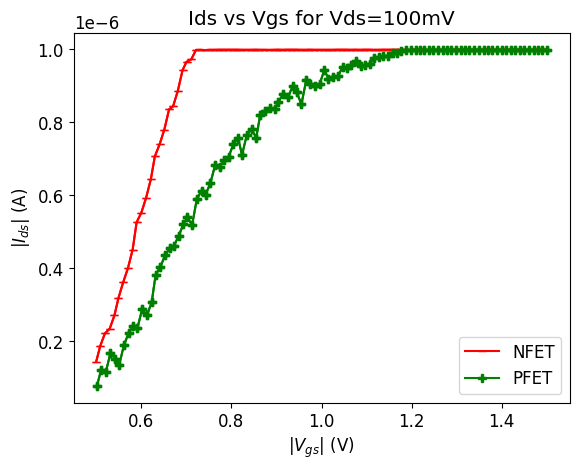

In [23]:
n_samples=100
vdd=1.8
vs=0
vd=.2 # NOTE play to get 'best' results
vb=0
vds=vd-vs
vg_low=.5 # NOTE adjust to capture only range that current ADC can capture without saturating
vg_high=vdd # NOTE adjust to capture only range that current ADC can capture without saturating
vg_arr=np.linspace(vg_low,vg_high,n_samples)

# NOTE that the limit of current measurement with default switch settings is 1uA, so if you do a sweep of Vg to vdd you will exceed this limit
vgn_actual,id_n,is_n, vgp_actual,id_p,is_p = measure_n_and_p_fet_ids_vs_vgs(coach, vs,vd ,vb, vg_arr)

# NOTE choose the ones that look best here
ids_n=is_n
ids_p=id_p 


In [ ]:
# if the data looks good, save it
savevars(datapath/'ids-vs-vgs-ohmic', overwrite='yes')

        

In [ ]:
# plot 
plt.plot(vgn_actual,ids_n)
plt.plot(vgp_actual,ids_p)
plt.title(f'Fig. 5.1 Ids vs Vgs for ohmic Vds={ef(vds)}V')
plt.ylabel('Ids (A)')
plt.xlabel('Vgs (V)')
plt.legend(['NFET','PFET'])


In [ ]:
# extract the valid range
def get_linear_range(vg:np.array,id:np.ndarray, range=[.1,.8]): # type hint for completion
    """ gets the vg and id that line in range of the source data
    
    :param vg: the gate voltages
    :param id: the drain currents
    :param range: [low,high] the range as fractions 0-1 of selected id currents
    :return: the selected vg,id
    """
    imin=np.min(id); imax=np.max(id)
    irange=imax-imin
    ilow=irange*range[0]
    ihigh=irange*range[1]
    idx=np.where((id>ilow) & (id<ihigh))
    if len(idx)==0:
        print('no id values are between {ef(imin*factor)} and {ef(id<imax/factor)}; change factors')
    return vg[idx], id[idx]

# first, subtract the minimum measured current which we consider the leakage current
idn_corr=ids_n-np.min(ids_n)
idp_corr=ids_p-np.min(ids_p)

vgn_lin,idn_lin=get_linear_range(vgn_actual,idn_corr)
vgp_lin,idp_lin=get_linear_range(vgp_actual,idp_corr)

# plot 
plt.plot(vgn_actual,idn_corr,'rx')
plt.plot(vgp_actual,idp_corr,'go')
plt.plot(vgn_lin,idn_lin,'r-')
plt.plot(vgp_lin,idp_lin,'g-')
plt.title(f'Fig. 5.2 Ids vs Vgs for ohmic Vds={ef(vds)}V')
plt.ylabel('|$I_{ds}|$ (A)')
plt.xlabel('|$V_{gs}|$ (V)') # note absolute value here
plt.legend(['NFET','PFET','NFET fit range','PFET fit range'])



(b) Now fit in the valid range (replace the lines showing your selected data with the actual fitted lines) to determine beta and VT0.

In [ ]:
# you can use code from lab2 to do this fit to  [vgn_actual,idn_corr] and [vgp_actual,idp_corr]
# loadvars(datapath/'lab3', overwrite='yes',warn=False) # if you come back here

# code from lab2 for fitting
# fit=stats.linregress(x,y) # fit a line to them; see https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html 
# idp_fit=np.exp(fit.intercept+x*fit.slope) # compute the fitted values on the gate voltage points
# i0p=np.exp(fit.intercept) # compute current at Vg=0
# # fit.slope is efolds/volt
# U_T=25e-3 # thermal voltage in Volts
# q=1.6e-19 # elementary change in Coulombs
# v_per_efold_p=1/fit.slope # compute the volts for one "e-fold" (factor of increase of e)
# # compute kappa from UT and v_per_efold
# kappa=U_T/v_per_efold_p
fit_n=stats.linregress(vgn_lin,idn_lin) # fit a line to them; see https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html 
fit_p=stats.linregress(vgp_lin,idp_lin) # fit a line to them; see https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html 
idn_fit=fit_n.intercept+vgn_lin*fit_n.slope # compute the fitted values on the gate voltage points
idp_fit=fit_p.intercept+vgp_lin*fit_p.slope # compute the fitted values on the gate voltage points
# units: fit.slope is A/V, fit.intercept is V
# ids=beta*(vg-vt)*vds

# plot 
plt.plot(vgn_actual,idn_corr,'rx')
plt.plot(vgp_actual,idp_corr,'go')
plt.plot(vgn_lin,idn_fit,'r-')
plt.plot(vgp_lin,idp_fit,'g-')
plt.title(f'Fig. 5.3 Fitted Ids vs Vgs for ohmic Vds={ef(vds)}V')
plt.ylabel('|$I_{ds}|$ (A)')
plt.xlabel('|$V_{gs}|$ (V)') # note absolute value here
plt.legend(['NFET','PFET','NFET fit','PFET fit'])


**(c)** Determine $V_{T0}$ and $\beta$ for both devices by using your fit to estimate the threshold voltage $V_{T}$ and transconductance paramter $\beta$, based on the expressions derived in the prelab

In [ ]:
# V_T0 for N and P FETs, you fill in the computations here based on your fit parameters extracted above
# units: fit.slope is A/V, fit.intercept is V
# ids=beta*(vg-vt)*vds

# vt0_n = ... # y=mx+b, m is slope, b is y-intercept, so x-intercept where y=0 is 0=mx+b, or x=-b/m
# vt0_p=...
# beta_n=...
# beta_p=...

# compute ratio
beta_np_ratio=beta_n/beta_p
print(f'V_TOn={vt0_n:.2f}V, beta_n={ef(beta_n)}A/V^2\nV_TOp={vt0_p:.2f}V, beta_n={ef(beta_p)}A/V^2')
print(f'Beta ratio NFET/PFET is {beta_np_ratio:.2f}')

* Does the ratio between $\beta$ for the 2 devices make sense based on the relative mobilities of electrons and holes? Please comment on your results.

* Is the relationship between $I_{ds}$ and $V_{gs}-V_T$ really linear? What is likely the cause of any discrepancy?

## 5.1 Effective surface mobility (optional)

Hint: Use the $V_{T0}$ you obtained in the last experiments but assume $\beta$ changes with $V_{gs}$ (thus $\mu_n$ and $\mu_p$ changes). **No need to measure again.**

In [ ]:
# plot mu vs Vgs for both devices in the same figure, i.e. the derivative of beta

- Why does the mobility peak and then decay instead of remaining constant? 

- What is the ratio between the **peak** mobilities for electrons and holes?

- How different are these values from the bulk mobilities for electrons (1350 ${\rm cm^2/V/s}$) and holes (480 ${\rm cm^2/V/s}$)? 

# 6 Drain Current in the saturation region

In this experiment, repeat nearly exactly the same experiement but with a **large** $V_{ds}$, to measure the _quadratic_ dependence of the current on the gate
voltage in the saturation region. 

* Repeat the experiments from Section 5 with a large $V_{ds}$.
* Remember you should plot $\sqrt(I_{ds}))$ vs. $V_{gs}$ to see if it behaves linearly as predicted.

In [ ]:
n_samples=100
vdd=1.8
vs=0
vd=1 # NOTE play to get 'best' results
vb=0
vds_sat=vd-vs
vg_low=.3 # NOTE adjust to capture only range that current ADC can capture without saturating
vg_high=.75 # NOTE adjust to capture only range that current ADC can capture without saturating
vg_arr=np.linspace(vg_low,vg_high,n_samples)

# NOTE that the limit of current measurement with default switch settings is 1uA, so if you do a sweep of Vg to vdd you will exceed this limit
vgn_actual_sat, ids_n_sat, is_n_sat, vgp_actual_sat, ids_p_sat, is_p_sat = measure_n_and_p_fet_ids_vs_vgs(coach, vs, vd, vb, vg_arr)


In [ ]:
# plot 
plt.plot(vgn_actual_sat,np.sqrt(ids_n_sat),'r-x')
plt.plot(vgp_actual_sat,np.sqrt(ids_p_sat),'g-o')
plt.title(f'Fig. 6.1 sqrt(Ids) vs Vgs for Vds={ef(vds_sat)}V') # NOTE sqrt(Ids)
plt.ylabel('$\sqrt{I_{ds}}$ ($\sqrt{A}$)')
plt.xlabel('|$V_{gs}|$ (V)') # note absolute value here
plt.legend(['NFET','PFET'])



In [ ]:
# looks good?
savevars(datapath/'ids-vs-vgs-saturation')

* From this saturation data, extract $\beta$ and $V_{T0}$

## 7 Comparisons of ohmic and saturation superthreshold transconductance models

* Are the measurements of $V_{T0}$ and $\beta$ from the saturation measurement consistent with the values obtained in the ohmic region? 

* Which is a better approximation, the linear one or the quadratic?

# 7 Early effect - Channel length modulation - Drain conductance

This experiment studies how Early voltage scales with transistor current; in particular, how valid are the simple assumptions about channel length modulation?

The measurements are nearly identical to previous one, only for each curve you will fix $V_{gs}$ and sweep $V_{ds}$, always still measuring $I_{ds}$. 

For your convenience, we made a function `measure_n_and_p_fet_ids_vs_vds` to do the measurement:

In [3]:
def measure_n_and_p_fet_ids_vs_vds(coach, vg_n, vg_p, vs, vb, vd_arr):
    """Measure NFET and PFET Ids vs Vds. The pfet voltages are set relative to Vdd and negated for you.
    
    :param coach: the Coach() board object
    :param vg_n: the NFET gate voltage (abs value relative to bulk)
    :param vg_p: the PFET gate voltage (abs value relative to bulk)
    :param vs: the Vs you want;
    :param vb: the Vb (bulk) you want
    :param vd_arr: np.ndarray of drain voltages, (abs value relative to bulk)
    :param measure_is: True to measure the source currents, False to measure drain currents. 
        It would seem to make more sense to measure source current because the voltage and hence leakage is fixed.
    :return: vds_actual_n, ids_n, vgp_actual_n, ids_p. 
        The quantized Vds and Ids currents.
    """
    measure_is=True # to change measurement from source to drain set False
    # actually measure_is=True measures NFET at src and PFET at drain
    coach.open()
    vdd=1.8
    ids_n=np.zeros_like(vd_arr) # for NFET
    ids_p=np.zeros_like(vd_arr) # for NFET
    vds_actual_n=np.zeros_like(vd_arr) # for NFET
    vds_actual_p=np.zeros_like(vd_arr) # for NFET
    delay=.01
    n_avg=100 # NOTE sets how many current measurements are averaged for each point
    print(f'averaging {n_avg} ids samples for each vds')

    coach.setup_nfet()
    vgn_actual=coach.set_nfet_vg(vg_n) # set gate bulk and src
    coach.set_nfet_vb(vb)
    coach.set_nfet_vs(vs)
    for i,v in enumerate(vd_arr): # note how enumerate returns the index i and the gate voltage v
        vds_actual_n[i]=coach.set_nfet_vd(v) # set drain
        time.sleep(delay)
        sum=0
        for j in range(n_avg):
            cur=(coach.measure_nfet_is() if measure_is else coach.measure_nfet_id())
            # print(f'cur {i} is {ef(cur)}A')
            sum+=cur
        avg=sum/n_avg
        ids_n[i]=avg
        # print(f'      NFET ids_n[{i}] is {ef(ids_n[i])}A')
        # ids_n[i]=coach.measure_nfet_is() if measure_is else coach.measure_nfet_id() # NOTE it might be better to measure Id here
        if i%10==0:
            print(f'NFET vg={ef(vg_n)}V vds={ef(v)}: ids_n={ef(ids_n[i])}')

    coach.setup_pfet()
    vgp_actual=vdd-coach.set_pfet_vg(vdd-vg_p) # store vsg from vdd
    coach.set_pfet_vb(vdd-vb)
    coach.set_pfet_vs(vdd-vs)
    for i,v in enumerate(vd_arr): # note how enumerate returns the index i and the gate voltage v
        vds_actual_p[i]=vdd-coach.set_pfet_vd(vdd-v)
        time.sleep(delay)
        sum=0
        for j in range(n_avg):
            cur=(coach.measure_pfet_id() if measure_is else coach.measure_pfet_is())
            # print(f'PFET cur {i} is {ef(cur)}A')
            sum+=cur
        avg=sum/n_avg
        ids_p[i]=avg
        # print(f'      PFET ids_n[{i}] is {ef(ids_p[i])}A')
        # ids_p[i]=coach.measure_pfet_id() if measure_is else coach.measure_pfet_is() # NOTE it might be better to measure Id here
        if i%10==0:
            print(f'PFET vg={ef(vg_p)}V vds={ef(v)}: ids_p={ef(ids_p[i])}')
    coach.close()
    ids_n=np.array(ids_n)
    ids_p=np.array(ids_p) # make num,py arrays to return and plot

    # subtract leakage at vds=0 from both curves
    nleak=ids_n[0]
    pleak=ids_p[0]
    print(f'subtracting leakage Ids at Vds=0 of NFET: {ef(nleak)}A PFET {ef(pleak)}A')
    ids_n-=nleak
    ids_p-=pleak
    
    # plot 
    plt.plot(vds_actual_n,ids_n,'r-*')
    plt.plot(vds_actual_p,ids_p,'g-*')
    plt.title(f'Ids vs Vds for Vg_n={ef(vg_n-vs)}V Vg_p={ef(vg_p-vs)}V')
    plt.ylabel('|$I_{ds}|$ (A)')
    plt.xlabel('|$V_{ds}|$ (V)') # note absolute value here
    plt.legend(['NFET','PFET'])
    plt.show()
    return vds_actual_n,ids_n,vds_actual_p,ids_p

**(a)** Measure $I_{ds}$ vs $V_{ds}$ for different $V_{gs}$ spanning as large a range of drain currents as you can confidently measure

Here is some measurement code for your convenience. You may need to adjust values; see NOTE

[INFO]: 2023-10-10 12:53:36,924 - NE1 - Opened CoACH at /dev/ttyACM0 with firmware version (1, 12, 5) (File "/root/GitLab/CoACH-labs/ne1.py", line 126, in open)
[INFO]: 2023-10-10 12:53:36,927 - NE1 - was already open (File "/root/GitLab/CoACH-labs/ne1.py", line 110, in open)


averaging 100 ids samples for each vds
NFET vg=900mV vds=0: ids_n=239.26n
NFET vg=900mV vds=620.69m: ids_n=10.84u
NFET vg=900mV vds=1.24: ids_n=11.11u
PFET vg=800mV vds=0: ids_p=6.49u
PFET vg=800mV vds=620.69m: ids_p=6.70u
PFET vg=800mV vds=1.24: ids_p=6.70u
subtracting leakage Ids at Vds=0 of NFET: 239.26nA PFET 6.49uA


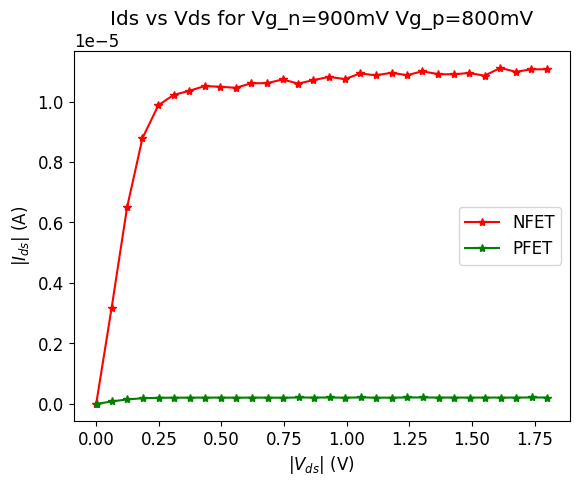

AttributeError: 'NoneType' object has no attribute 'open'

In [17]:
coach=Coach()
coach.open()
n_samples=30 # NOTE how many vds values
vdd=1.8
# NOTE that the limit of current measurement with default switch settings is 1uA, so if you do a sweep of Vg to vdd you will exceed this limit
n_gate_voltages=8
vg_arr_n=np.linspace(.9,1.5,n_gate_voltages) # NOTE you may need to play with these values
vg_arr_p=np.linspace(.8,1.5,n_gate_voltages) # NOTE you may need to play with these values
vd_arr=np.linspace(0,vdd,n_samples)
vs=0
vb=0
vds=vd_arr-vs
idsnlist=[]
idsplist=[] # make arrays and stack at the end https://stackoverflow.com/questions/58083743/what-is-the-fastest-way-to-stack-numpy-arrays-in-a-loop

for i in range(n_gate_voltages):
    vgn=vg_arr_n[i]
    vgp=vg_arr_p[i]
    vds_actual_n,ids_n,vds_actual_p,ids_p=measure_n_and_p_fet_ids_vs_vds(coach, vgn, vgp, vs, vb, vd_arr)
    idsnlist.append(ids_n)
    idsplist.append(ids_p)
ids_vs_vds_n=np.stack(idsnlist)
ids_vs_vds_p=np.stack(idsplist)

* Does the data make sense? If not change your parameters

* When you have good looking data, plot it all together

In [ ]:
# plots summarized Ids vs Vds data
def plot_idsvds_curves(vg_arr, vds, ids_matrix, title):
    plt.title(f'Fig. 7.1 {title} Ids vs Vd for various Idsat')
    plt.ylabel('|$I_{ds}|$ (A)')
    plt.xlabel('$V_{d}$ (V)') # note absolute value here
    leg=[]
    for i,v in enumerate(vg_arr):
        plt.plot(vds,np.transpose(ids_matrix[i,:]),'-*')
        leg.append(str(ef(v))+'V')
    plt.legend(leg)
    plt.show()
plot_idsvds_curves(vg_arr_n,vds_actual_n, ids_vs_vds_n, 'NFET')
plot_idsvds_curves(vg_arr_p,vdd-vds_actual_p,ids_vs_vds_p, 'PFET')


* **(b)** Fit a line to the ”flat” part of each drain current curve. Select a range of drain voltages to fit the line and use the same range for each curve, because the Early effect is actually curved in reality, and what you are actually seeing might include the start of Drain Induced Barrier Lowering (DIBL) or impact ionization. This is a bit unlikely for such long (1$\mu$m) FETs, but you can see if the slope increases for large $V_{ds}$.

**You only need to do N-FET**  You can add the PFET if you are curious about it, because it appears to have a **much** higher Early voltage.

* Compute the Early voltage from the fitted slope of I vs V and the I intercept
* Plot the Early voltage vs drain current on a semilogx scale.

In [ ]:
# the data are vg_arr_n,vds_actual_n, ids_vs_vds_n
idx=np.where(vds_actual_n>.3)
vds=vds_actual_n[idx]
ve_fits=[]
id_sats=[]
v_earlys=[]
for i in range(ids_vs_vds_n.shape[0]): # for each drain curve
    ids=np.squeeze(ids_vs_vds_n[i,idx]) # we have to squeeze (remove the singleton dimension for this stupid array)
    ve_fit=np.polyfit(vds,ids,1) # compute linear fit, ve_fit[0] is the slope and ve_fit[1] is the y-intercept (id_sat)
    ve_fits.append(ve_fit)
    idsat=ve_fit[1] # Id_sat
    didv=ve_fit[0] # d(I)/d(V)
    id_sats.append(idsat)
    vearly=idsat/didv # NOTE does this make sense?
    v_earlys.append(vearly)

plt.semilogx(id_sats,v_earlys,'-*')
plt.title(f'Fig. 7.2 NFET Early voltage vs Saturation current')
plt.xlabel('$I_{dsat}$ (A)')
plt.ylabel('$V_{E}$ (V)')



In [ ]:
savevars(datapath/'early')

* Comment on your results: How constant is the Early voltage with drain current? Speculate on the reasons for your observations.

# 8 Saturation drain voltage

* Can you see how the saturation voltage increases with the gate overdrive $V_{\rm ov}$ in strong inversion? Please comment if the observation matches the model of $V_{\rm dsat}$ or not. I.e. is it true quantitatively that $V_{\rm dsat}=V_{\rm ov}$?


* Using your prior measurement of $V_{Tn}$, can you plot together with the $I_{ds}$ curves a curve showing the predicted  $V_{\rm dsat}$ values?

# 9 Congratulations

**If you completed this lab, you have done a lot!** This is one of the most time-consuming labs but also one of the most important, because practical and intuitive knowledge of transistor characteristics is crucial in understanding and synthesizing new circuits that work.

## Upload your report (this notebook)
Upload your report to the course dropbox as either HTML or PDF (not pynb, which is hard for us to assess).

## What we expect you to learn
Please see the [NE1 exam preparation guide](https://drive.google.com/file/d/1nOq3UbcEv_ik425VBYqcH9hAET7FyIeP/view?usp=drive_link)
